<center> <h1>Analiza zadovoljstva/sreće po pojedinim državama</h1>

<h3>Seminarski rad</h3> 

<hr>
<h3>Nikolina Vidović i Nika Jerković</h3>

Link na podatke: https://www.kaggle.com/unsdsn/world-happiness?select=2016.csv

In [1]:
#biblioteke
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plot
import scipy.stats as stats
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.manifold import TSNE
import math
import numpy as np
from sklearn.model_selection import train_test_split
# modeli regresija
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
# evaluacijske metrike
from sklearn import metrics
# za vizualizaciju na karti svijeta
import plotly.graph_objs as go
from plotly.offline import iplot

## Učitavanje podataka 



> U nastavku učitavamo podatke iz .csv datoteka za svih 5 godina, podatke za svaku godinu spremamo u zasebni dataframe i svakom od spomenutih dataframeova odajemo stupac 'year', gdje upisujemo godinu na koju se dataframe odnosi. Također preimenujemo stupce kako bi u svim dataframeovima imali iste nazive stupaca i mičemo stupce za koje smatramo da nisu relevantni za daljnju analizu ili nisu dostupni za sve godine. 



In [5]:
df2015 = pd.read_csv('2015.csv')
df2015['year']=2015
df2015 = df2015.drop(['Standard Error','Dystopia Residual'],axis=1)
df2015.head()

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,year
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


In [3]:
df2016 = pd.read_csv('2016.csv')
df2016['year']=2016
df2016 = df2016.drop(['Lower Confidence Interval','Upper Confidence Interval','Dystopia Residual'],axis=1)
df2016.head()

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,year
0,Denmark,Western Europe,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2016
1,Switzerland,Western Europe,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2016
2,Iceland,Western Europe,3,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2016
3,Norway,Western Europe,4,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2016
4,Finland,Western Europe,5,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2016


In [6]:
df2017 = pd.read_csv('2017.csv')
df2017['year']=2017
df2017.rename(columns={'Economy..GDP.per.Capita.':'Economy (GDP per Capita)',\
                    'Trust..Government.Corruption.':'Trust (Government Corruption)',\
                    'Happiness.Score':'Happiness Score',\
                    'Health..Life.Expectancy.':'Health (Life Expectancy)','Dystopia.Residual':'Dystopia Residual','Happiness.Rank':'Happiness Rank'}, inplace=True)

df2017 = df2017.drop(['Whisker.high','Whisker.low','Dystopia Residual'],axis=1)
df2017.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),year
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2017
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2017
2,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2017
3,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2017
4,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2017


In [7]:
df2018 = pd.read_csv('2018.csv')
df2018['year']=2018
df2018.rename(columns={'Score':'Happiness Score', \
                   'GDP per capita': 'Economy (GDP per Capita)',\
                   'Country or region':'Country',\
                   'Healthy life expectancy':'Health (Life Expectancy)',\
                   'Overall rank':'Happiness Rank',\
                   'Freedom to make life choices':'Freedom',\
                   'Perceptions of corruption':'Trust (Government Corruption)','Social support':'Family'}, inplace=True)
df2018.head()

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),year
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,2018
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,2018
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,2018
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,2018
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,2018


In [8]:
df2019 = pd.read_csv('2019.csv')
df2019['year']=2019
df2019.rename(columns={'Score':'Happiness Score', \
                   'GDP per capita': 'Economy (GDP per Capita)',\
                   'Country or region':'Country',\
                   'Healthy life expectancy':'Health (Life Expectancy)',\
                   'Overall rank':'Happiness Rank',\
                   'Freedom to make life choices':'Freedom',\
                   'Perceptions of corruption':'Trust (Government Corruption)','Social support':'Family'}, inplace=True)
df2019.head()

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),year
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2019
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2019
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2019
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2019
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2019


## Pronalaženje najsretnijih i najnesretnijih zemalja



> Cilj nam je pronaći u kojim su zemljama stanovnici najsretniji, a u kojima najnesretniji. U nastavku smo pronašli top 5 najsretnijih i top 5 najnesretnijih zemalja u 2015. godini.



In [9]:
dict_2015_max = df2015.set_index('Country').iloc[0:5].to_dict()['Happiness Score']
dict_2015_max = list(dict_2015_max.keys())
print('Top 5 najsretnijih zemalja u 2015.godini:', dict_2015_max)

Top 5 najsretnijih zemalja u 2015.godini: ['Switzerland', 'Iceland', 'Denmark', 'Norway', 'Canada']


In [10]:
dict_2015_min = df2015.set_index('Country').iloc[-5:].to_dict()['Happiness Score']
dict_2015_min = list(dict_2015_min.keys())
print('Top 5 najnesretnijih zemalja u 2015.godini:',dict_2015_min)

Top 5 najnesretnijih zemalja u 2015.godini: ['Rwanda', 'Benin', 'Syria', 'Burundi', 'Togo']


## Promjena sreća/zadovoljstva stanovnika pojedinih zemalja u razdoblju od 2015. do 2019.



> Promotrit ćemo kako se sreća/zadovoljstvo stanovnika top 5 najsretnijih i top 5 najnesretnijih zemalja mijenjalo u razdoblju od 2015. do 2019. godine. Također ćemo provjerit postoji li neka godina u kojoj su generalno svi stanovnici svijeta bili sretniji/manje sretni. 


Kako bi to lakše postigli prvo ćemo spojiti svih 5 godina u zajednički dataframe. 


In [11]:
df_concat=pd.concat([df2015,df2016,df2017,df2018,df2019])
df_concat.head()

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,year
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


In [12]:
# ovo radimo jer nam se u suprotnom godina u grafu prikazuje u obliku decimalnog broja
df_concat['year'] = df_concat['year'].astype(str)

In [13]:
# računamo prosjek happiness scorea za svaku gogodinu
happiness_score_by_year = df_concat.groupby(['year'])
happiness_score_by_year = happiness_score_by_year.mean()
happiness_score_by_year = pd.DataFrame(happiness_score_by_year,columns=['Happiness Score'])
print(happiness_score_by_year)

      Happiness Score
year                 
2015         5.375734
2016         5.382185
2017         5.354019
2018         5.375917
2019         5.407096


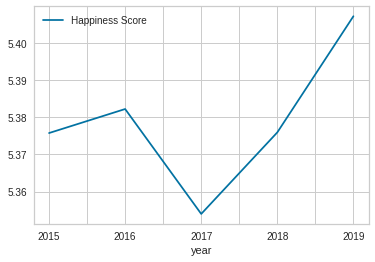

In [14]:
happiness_score_by_year.plot();

Iz dobivenog rezultata možemo zaključiti da su stanovnici cijelog svijeta u razdoblju od 2015.-2019. najnesretniji bili 2017.godine, a najsretniji 2019.godine. Ono što je bitno naglasiti je da ta razlika nije toliko značajna s obzirom da se radi o razlici u nekoliko decimala. 

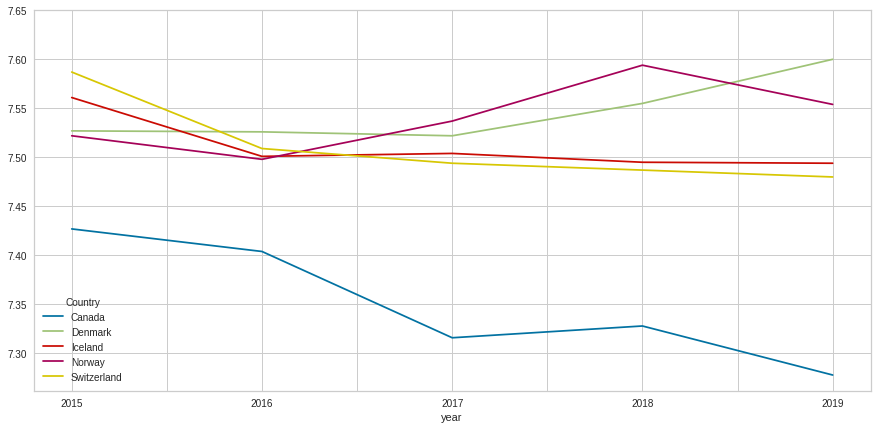

In [15]:
# na istom grafu prikazujemo kako se happiness score mijenjao kroz godine u top 5 najsrentijih država
happiest_countries = df_concat[(df_concat.Country == 'Switzerland') | (df_concat.Country == 'Iceland') | (df_concat.Country == 'Denmark') | (df_concat.Country == 'Norway') | (df_concat.Country == 'Canada')]

#Plot happiness scores
fig, ax = plt.subplots(figsize=(15,7))
happiest_countries.groupby(['year','Country']).mean()['Happiness Score'].unstack().plot(ax=ax)
plt.yticks(np.arange(7.30, 7.65, 0.05));

Vidimo da je europskim zemljama(Danska,Island,Norveška,Švicarska) razina sreće uvijek veća nego kod Kanade. Kanada se ovdje našla jer smo odlučili promatrati sreću kroz godine za top 5 zemalja iz 2015.godine. Primjećujemo da je Kanada te godine bila blizu spomenutim europskim zemljama, no nakon toga zadovoljstvo njenih stanovnika opada, tako da je moguće da smo promatrali neku godinu osim 2015.,da se nebi ni našla u top 5 najsretnijih.

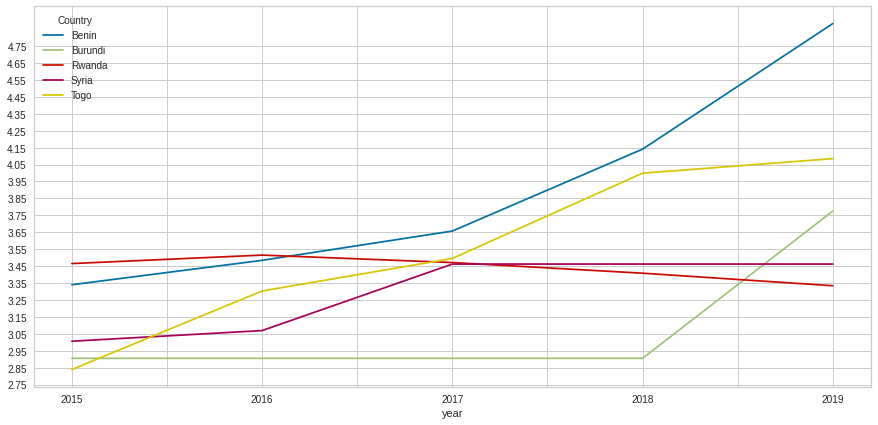

In [16]:
# na istom grafu prikazujemo kako se happiness score mijenjao kroz godine u top 5 najnesrentijih država
least_happy_countries = df_concat[(df_concat.Country == 'Rwanda') | (df_concat.Country == 'Benin') | (df_concat.Country == 'Syria') | (df_concat.Country == 'Burundi') | (df_concat.Country == 'Togo')]
fig, ax = plt.subplots(figsize=(15,7))
least_happy_countries.groupby(['year','Country']).mean()['Happiness Score'].unstack().plot(ax=ax)
plt.yticks(np.arange(2.75, 4.80, 0.1));

## Sreća/zadovoljstvo stanovnika po regijama kojima zemlje pripadaju



> Prikazat ćemo sreću stanovnika po regijama kojima zemlje pripadaju. To ćemo napraviti samo za godine 2015. i 2016. jer nam je samo za te godine dostupna informacija o regijama. 



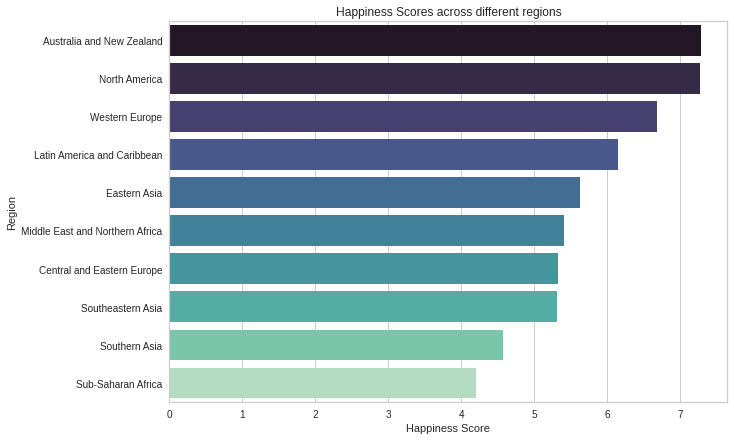

In [17]:
region = df2015.groupby('Region').mean()
reg=region.sort_values(by='Happiness Score',ascending=False,axis=0)
plt.figure(figsize=(10,7))
plt.title('Happiness Scores across different regions')
sns.barplot(x='Happiness Score',y=reg.index,data=reg,palette='mako')

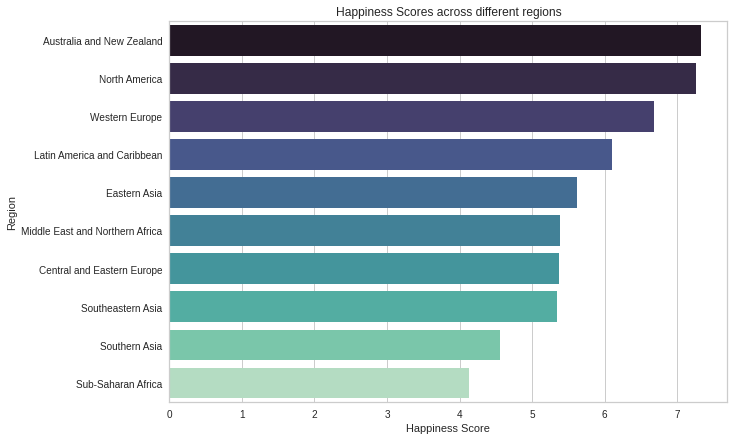

In [18]:
region = df2016.groupby('Region').mean()
reg=region.sort_values(by='Happiness Score',ascending=False,axis=0)
plt.figure(figsize=(10,7))
plt.title('Happiness Scores across different regions')
sns.barplot(x='Happiness Score',y=reg.index,data=reg,palette='mako')

Možemo primjetiti da je sreća po regijama ista 2015. i 2016.godinu s nekim malim razlikama. U oba slučaja su stanovnici najsretniji u Australiji i Novom Zelandu, pa u Sjevernoj Americi i Zapadnoj Europi. Najnesretniji su Južnoj Aziji i Subsaharskoj Africi. 

U nastavku ćemo promotriti kakve su vrijednosti nekih čimbenika u državama koje pripadaju istoj regiji. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



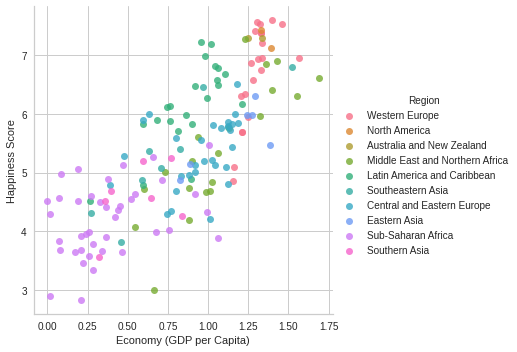

In [19]:
sns.lmplot('Economy (GDP per Capita)', 'Happiness Score', data=df2015, hue='Region', fit_reg=False)

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



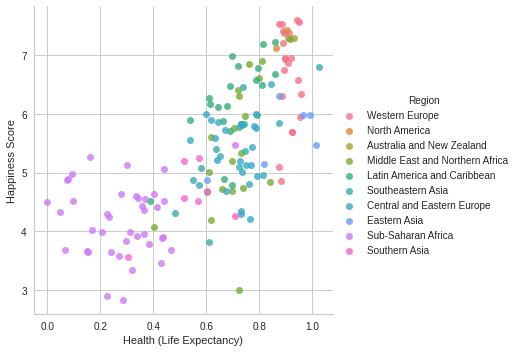

In [20]:
sns.lmplot('Health (Life Expectancy)', 'Happiness Score', data=df2015, hue='Region', fit_reg=False)

plt.show()

Vidimo da su vrijednosti GDP-a i Healtha, za države koje pripadaju istoj regiji većinom slične. Npr. vidimo da su ljubičaste "točkice" koje predstavljaju Subsaharsku Afriku uvijek u području manjih vrijednosti i primjećujemo "nakupinu ljubičastih točkica". Najveće oscilacije primjećujemo kod Zapadne Europe, gdje su točkice u obliku skoro pa okomite linije što znači da vrijednosti za promatrane čimbenike osciliraju od srednjih prema visokim. 

## Statistička značajnost



> Provjerit ćemo postoji li statistički značajna razlika u zadovoljstvu stanovnika zemalja Srednje i istočne Europe i zemalja Subsaharske Afrike. Iz gore prikazanih vizualizacija vidimo da razlika postoji, ali postavlja se pitanje je li razlika statistički značajna. 



*$H_0$: Srednja vrijednost happiness scorea je jednaka za Srednju i Istočnu Europu i zemlje Subsaharske Afrike.* <br>

*$H_1:$ Srednja vrijednost happiness scorea nije jednaka za Srednju i Istočnu Europu i zemlje Subsaharske Afrike..*<br>

In [21]:
happiness_and_region = df2015[['Happiness Score','Region']]
happiness_and_region.head()

,Happiness Score,Region
0,7.587,Western Europe
1,7.561,Western Europe
2,7.527,Western Europe
3,7.522,Western Europe
4,7.427,North America


In [22]:
Europe_and_Africa = happiness_and_region.loc[(happiness_and_region['Region'] == 'Central and Eastern Europe') | (happiness_and_region['Region'] == 'Sub-Saharan Africa')]
Europe_and_Africa.head()

,Happiness Score,Region
30,6.505,Central and Eastern Europe
43,6.003,Central and Eastern Europe
44,5.995,Central and Eastern Europe
51,5.889,Central and Eastern Europe
53,5.855,Central and Eastern Europe


Prije same provjere hipoteza, trebamo provjeriti radi li se o normalnoj ditribuciji, kako bi mogli odlučiti koji je test najbolje koristiti. To radimo pomoću Shapiro-Wilk testa, koji kao nultu hipotezu ima da su podaci normalno distribuirani. Kao razinu značajnosti za Shapiro-Wilk test, uzet ćemo 0.05. 


> *In practice, the Shapiro-Wilk test is believed to be a reliable test of normality, although there is some suggestion that the test may be suitable for smaller samples of data, e.g. thousands of observations or fewer.*

Kako u cijelom dataframeu Europe_and_Africa imamo 69 redaka  Shapiro-Wilk testa je pogodan za našu situaciju. 



In [23]:
Europe_and_Africa.columns = ['Score', 'Region']

In [24]:
def test_of_normality(data):
  alpha = 0.05
  stat, p = stats.shapiro(data)
  if p > alpha:
	  print('Sample looks Gaussian')
  else:
	  print('Sample does not look Gaussian')


In [25]:
# za Europu
test_of_normality(Europe_and_Africa.Score[Europe_and_Africa['Region']=='Central and Eastern Europe'])

Sample looks Gaussian


In [26]:
# za Afriku
test_of_normality(Europe_and_Africa.Score[Europe_and_Africa['Region']== 'Sub-Saharan Africa'])

Sample looks Gaussian


Iz provjere Shapiro-Wilk testom, zaključujemo da su podaci za Europu i za Afriku normalno distribuirani, pa možemo koristiti t-test za provjeru hipoteza. 

In [ ]:
pip install --upgrade scipy # rješava error kojeg dobijemo s ttestom

     |████████████████████████████████| 38.1 MB 1.2 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
stats.ttest_ind(Europe_and_Africa.Score[Europe_and_Africa['Region']=='Central and Eastern Europe'],Europe_and_Africa.Score[Europe_and_Africa['Region']== 'Sub-Saharan Africa'], alternative = 'two-sided')

Ttest_indResult(statistic=7.8071722676846695, pvalue=5.3589206854765806e-11)

Kada smo dobili p-vrijednost, trebamo odlučiti koju razinu značajnosti ćemo uzeti u obzir. Pronašli smo informaciju da se za humanistička/socijalna istraživanja(kao što je ovo), koristi razina značajnosto 0.05 do 0.1.

S obzirom da nam je p vrijednost jako mali broj, koju god razinu značajnosti uzeli iz gore navedenog intervala, dobit ćemo da pvalue < razine značajnosti. Dakle, odbacujemo $H_0$ u korist $H_1$. 
Drugim riječima, na razini značajnosti 0.05-0.1, tvrdimo da srednja vrijednost happiness scorea nije jednaka za Srednju i Istočnu Europu i zemlje Subsaharske Afrike, odnosno da je razlika u njihovim srednjim vrijednostima ipak statistički značajna.

## Utjecaj različitih čimbenika na zadovoljstvo stanovnika





> Provjerit ćemo kako sljedeći čimbenici utječu na zadovoljstvo stanovnika: Economy (GDP per Capita), Family, Health (Life Expectancy), Freedom, Trust (Government Corruption). To ćemo promatrati pomoću matrice korelacija i pairplota, koji nam oboje na različite načine prikazuju odnos među čimbenicima. Mi ćemo promatrati Happiness Score i udnosu na gore navedene čimbenike. 





### Matrice korelacija

Text(0.5, 1.0, 'Correlation Coefficient of 2015 data')

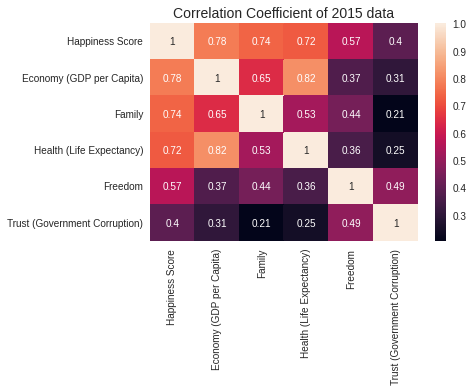

In [27]:
corrMatrix2015 = df2015[['Happiness Score','Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)']].corr()
sns.heatmap(corrMatrix2015,annot=True)
plt.title('Correlation Coefficient of 2015 data', fontsize=14)

Text(0.5, 1.0, 'Correlation Coefficient of 2016 data')

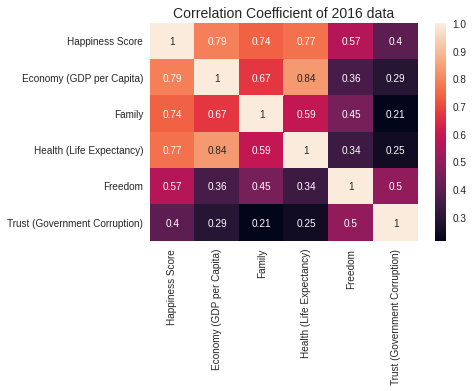

In [28]:
corrMatrix2016 = df2016[['Happiness Score','Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)']].corr()
sns.heatmap(corrMatrix2016,annot=True)
plt.title('Correlation Coefficient of 2016 data', fontsize=14)

Text(0.5, 1.0, 'Correlation Coefficient of 2017 data')

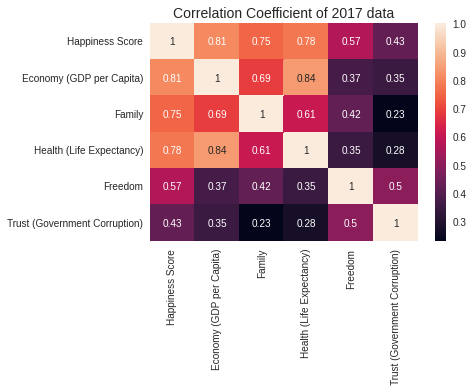

In [29]:
corrMatrix2017 = df2017[['Happiness Score','Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)']].corr()
sns.heatmap(corrMatrix2017,annot=True)
plt.title('Correlation Coefficient of 2017 data', fontsize=14)

Text(0.5, 1.0, 'Correlation Coefficient of 2018 data')

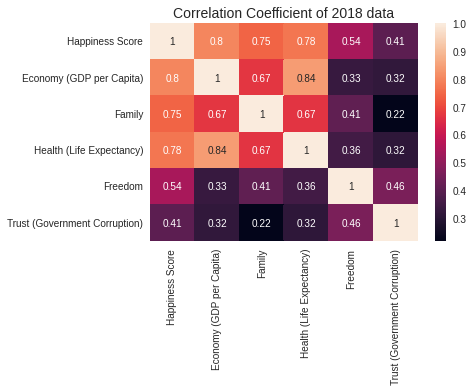

In [30]:
corrMatrix2018 = df2018[['Happiness Score','Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)']].corr()
sns.heatmap(corrMatrix2018,annot=True)
plt.title('Correlation Coefficient of 2018 data', fontsize=14)

Text(0.5, 1.0, 'Correlation Coefficient of 2019 data')

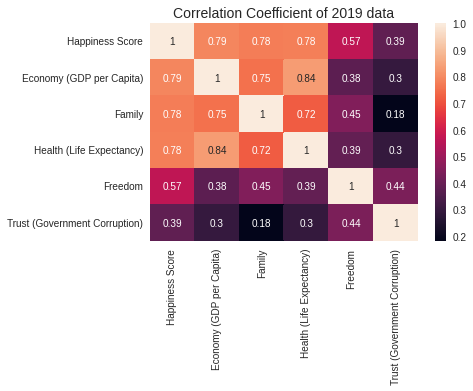

In [31]:
corrMatrix2019 = df2019[['Happiness Score','Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)']].corr()
sns.heatmap(corrMatrix2019,annot=True)
plt.title('Correlation Coefficient of 2019 data', fontsize=14)

### Pairplotovi


2015


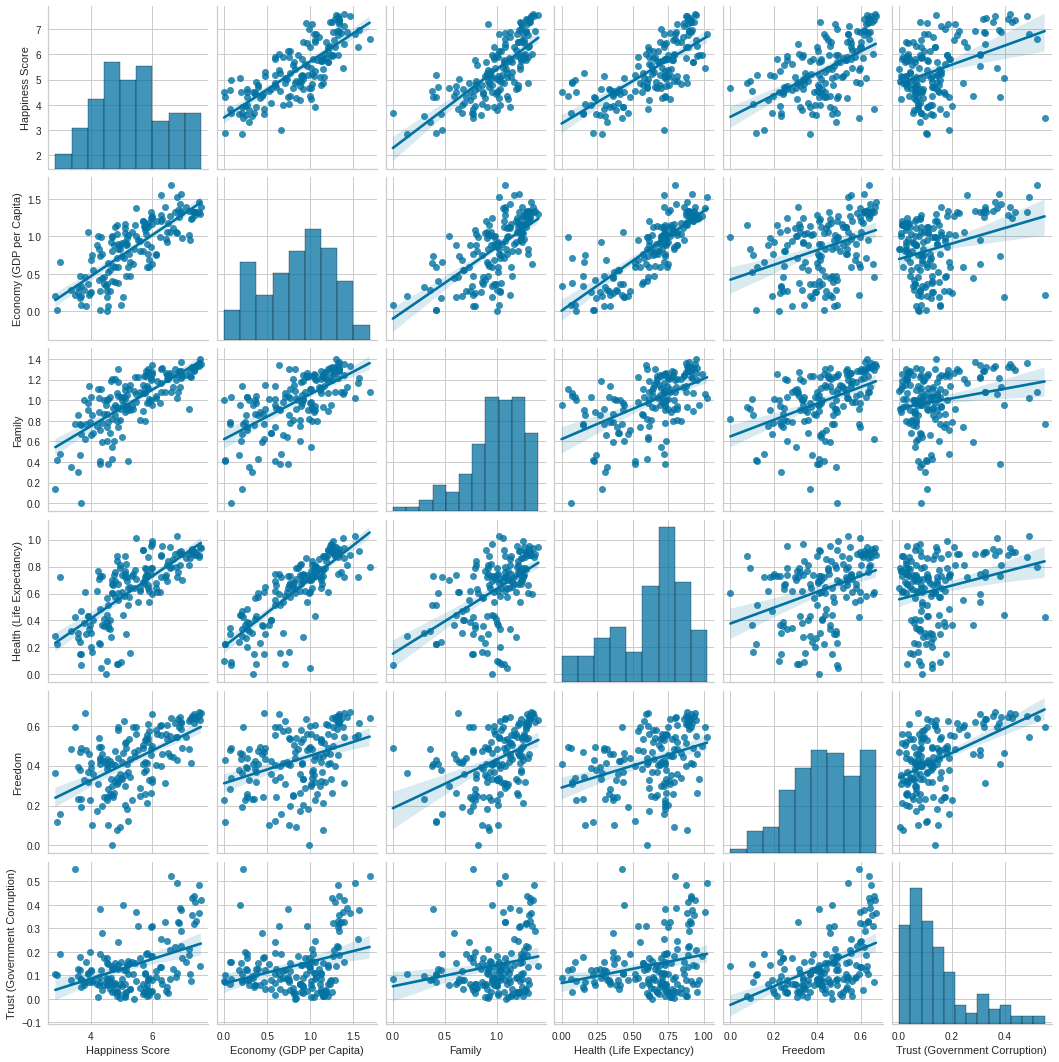

In [32]:
sns.pairplot(df2015,kind = 'reg', vars =['Happiness Score','Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)'])
print('2015')

2016


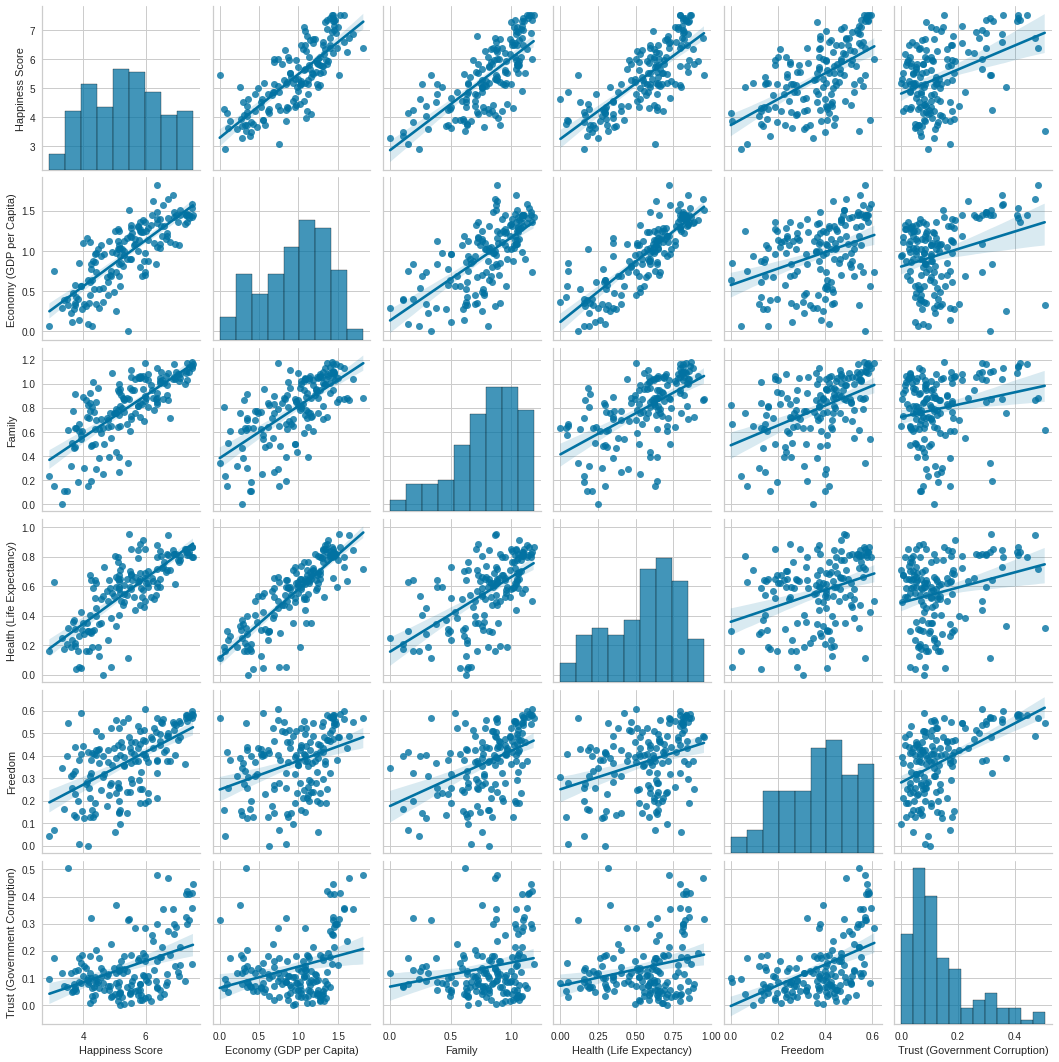

In [33]:
sns.pairplot(df2016,kind = 'reg', vars =['Happiness Score','Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)'])
print('2016')

2017


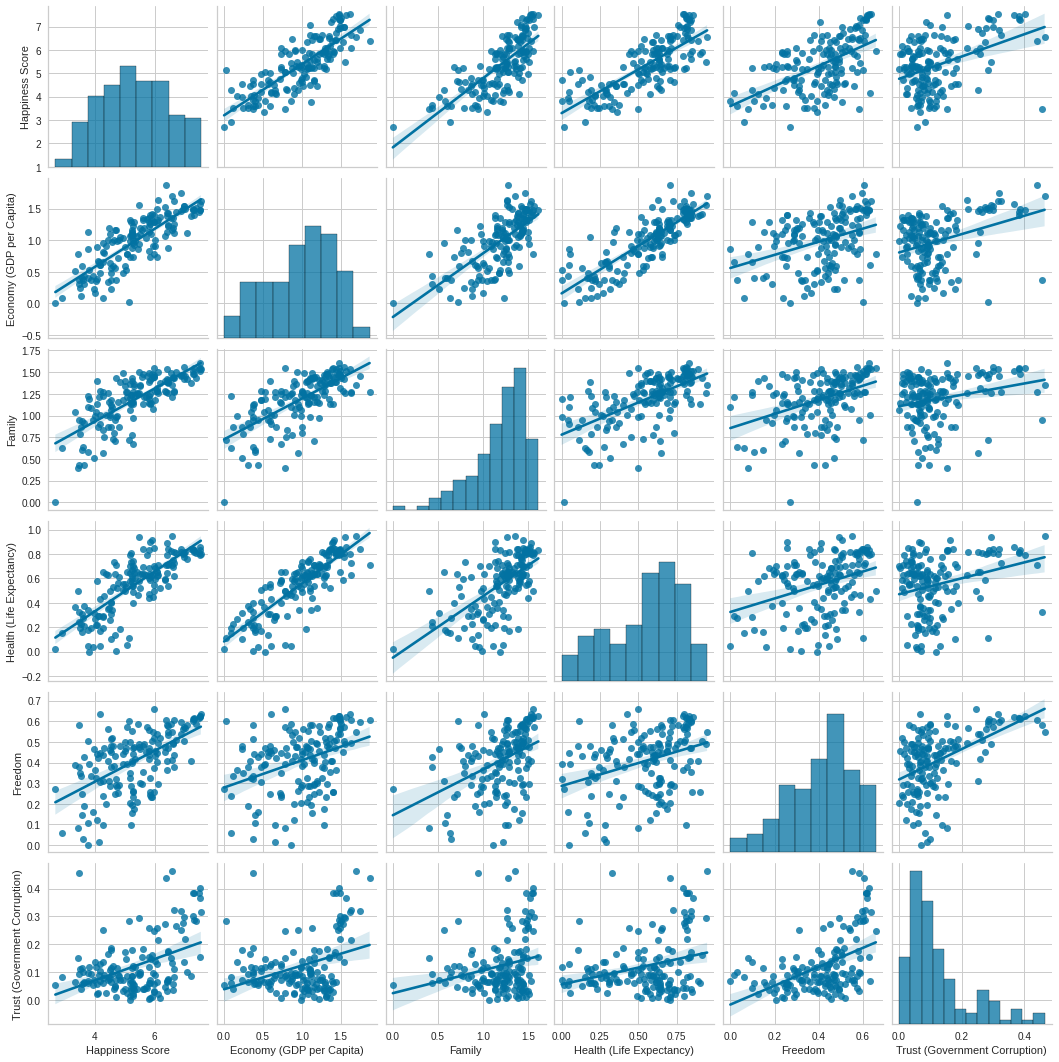

In [34]:
sns.pairplot(df2017,kind = 'reg', vars =['Happiness Score','Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)'])
print('2017')

2018


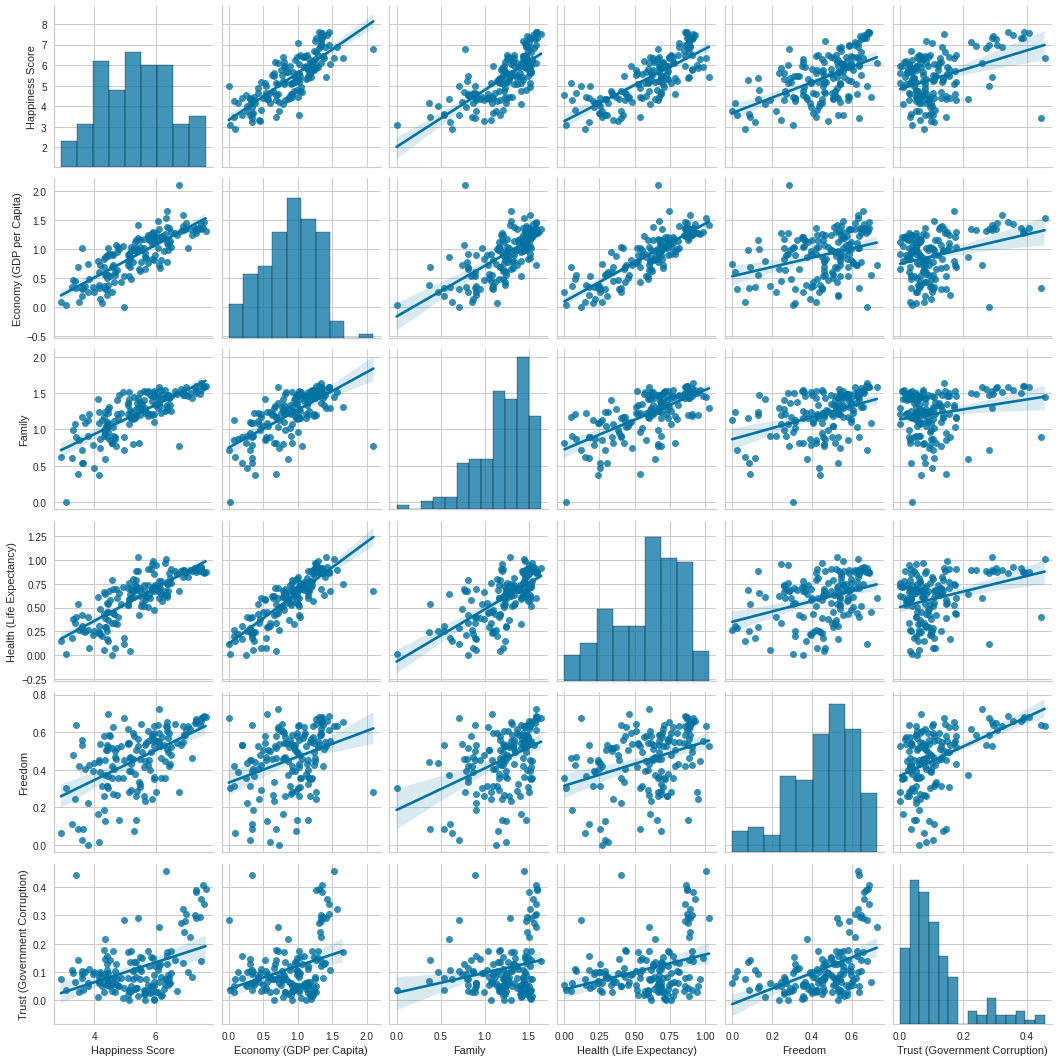

In [35]:
sns.pairplot(df2018,kind = 'reg', vars =['Happiness Score','Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)'])
print('2018')

2019


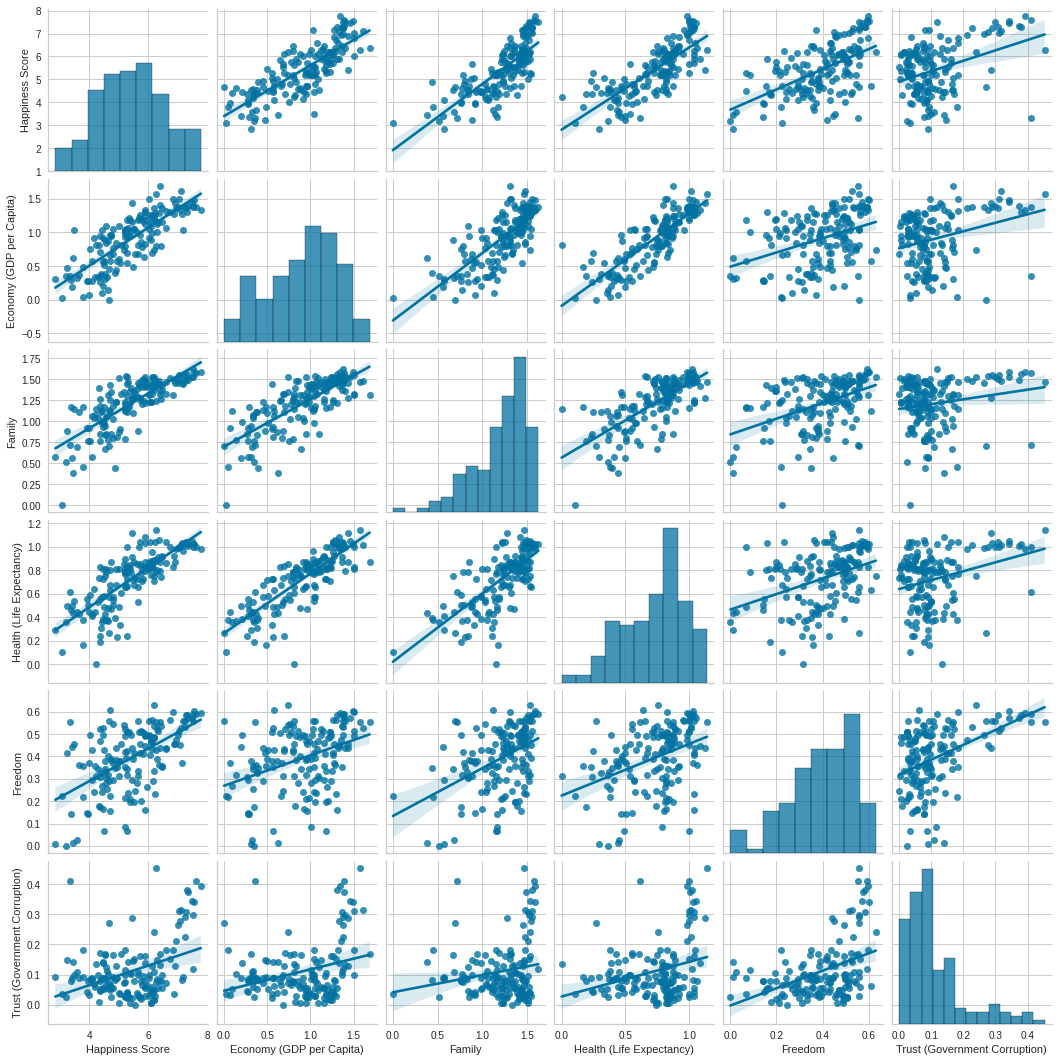

In [36]:
sns.pairplot(df2019,kind = 'reg', vars =['Happiness Score','Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)'])
print('2019')

### Opažanja

Možemo primjetiti da se odnos čimbenika i happiness scorea ne mijenja značajno od godine do godine. U svakoj godini pojedini čimbenik otprilike jednako utječe na sreću kao i u ostalim godinama, stoga nema smisla komentirati svaku godinu zasebno.

Iz gore navedenih vizualizacija možemo primjetiti da najveći utjecaj na sreću imaju ekonomija(odnosno GDP), obitelj i zdravlje. Od ta tri čimbenika ekonomija ima najveći utjecaj, no razlika s obzirom na druga dva čimbenika je jako mala. Nešto manji utjecaj na sreću imaju sloboda i povjerenje prema vladi. Bitno je napomenuti i da su svi čimbenici pozitivno korelirani, dakle kako oni rastu, tako raste i happiness score. 

Što se tiče međusobnog odnosa čimbenika, najveću korelaciju za sve godine primjećujemo između ekonomije(odnosno GDP) i zdravlja, što nam sugerira da što je država bogatija, to njeni stanovnici imaju duži životni vijek. 

## Grupiranje zemalja u k nakupina(clustering)





> Cilj nam je grupirati zemlje u k nakupina.Za grupiranje ćemo koristiti K-Means algoritam. Primjenit ćemo različite tehnike kako bi vidjeli koji je broj grupa prikladan te ćemo promotriti koje su zemlje grupirane zajedno te kakva je distribucija zemalja po nakupinama. 



In [37]:
# odabiremo čimbenike koje ćemo koristiti kod clusteriranja
df2015_happiness = df2015[['Country','Happiness Score','Economy (GDP per Capita)','Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity'	]]
df2015_happiness = pd.DataFrame(df2015_happiness)
df2015_happiness = df2015_happiness.set_index('Country')
df2015_happiness.head()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
Country,,,,,,,
Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


### Biranje prikladnog broja nakupina

In [38]:
no_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
for cluster in no_clusters:
    km = KMeans(n_clusters=cluster)
    predictions = km.fit_predict(df2015_happiness)
    centers = km.cluster_centers_

    s_score = silhouette_score(df2015_happiness, predictions)
    print("For n_clusters = {}, silhouette score is {})".format(cluster, s_score))

For n_clusters = 2, silhouette score is 0.5121934746667255)
For n_clusters = 3, silhouette score is 0.42405268547312797)
For n_clusters = 4, silhouette score is 0.37817895946034663)
For n_clusters = 5, silhouette score is 0.33994320454977767)
For n_clusters = 6, silhouette score is 0.29860364760616703)
For n_clusters = 7, silhouette score is 0.30024195515712027)
For n_clusters = 8, silhouette score is 0.28450136284123373)
For n_clusters = 9, silhouette score is 0.26530293625111917)
For n_clusters = 10, silhouette score is 0.2531806085718294)
For n_clusters = 11, silhouette score is 0.24707925428331776)
For n_clusters = 12, silhouette score is 0.24600748125512667)
For n_clusters = 13, silhouette score is 0.23056868629687965)
For n_clusters = 14, silhouette score is 0.2322341789968751)
For n_clusters = 15, silhouette score is 0.24209919895646306)
For n_clusters = 16, silhouette score is 0.23380242701553317)
For n_clusters = 17, silhouette score is 0.23846223934161237)
For n_clusters = 18

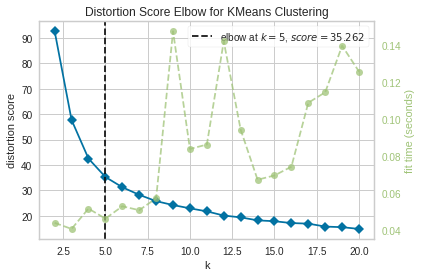

In [39]:
km = KMeans()
vis = KElbowVisualizer(km, k=(2,21))

vis.fit(df2015_happiness)
vis.poof()

In [40]:
cluster_count = math.ceil(math.sqrt(len(df2015_happiness.index))) 
print('Cluster count:', cluster_count)

Cluster count: 13


Koristili smo tri različite metode odabira prikladnog broja nakupina. Silhouette analiza daje najbolji score za 2, pa za 3, pa za 4, pa za 5 nakupina. Metoda lakta nam predlaže 5 nakupina, a posljednja metoda 13. 
Napravit ćemo clusteriranje s brojem nakupina koje nam je sugerirala svaka od primjenjenih metoda pronalaska prikladnog broja nakupina, dakle 2,5 i 13.

### Clusteriranje s 2 nakupine



> Grupiranjem svih država svijeta u dvije nakupine ćemo možda dobiti podjelu država svijeta na sretne i nesretne.



In [63]:
km = KMeans(n_clusters=2, random_state=0)
labels = km.fit_predict(df2015_happiness)

In [64]:
names_for_labels = [f"Cluster {label}" for label in labels]
clusters_and_countries_2= pd.DataFrame(zip(df2015_happiness.index,names_for_labels),columns=["Series","Cluster"]).sort_values(by="Cluster").set_index("Series")
clusters_and_countries_2

,Cluster
Series,
Switzerland,Cluster 0
Paraguay,Cluster 0
Moldova,Cluster 0
Bolivia,Cluster 0
Italy,Cluster 0
...,...
Dominican Republic,Cluster 1
Lesotho,Cluster 1
Bosnia and Herzegovina,Cluster 1


Promatranjem koje su države grupirane zajedno, vidimo da su sve Skandinavske države(koje su se prethodno ispostavile sretnima), u Clusteru 0, u tom clusteru su također i Canada i sve razvijenije zemlje. Zanimljivo je da je i Hrvatska u istoj nakupini s njima. 

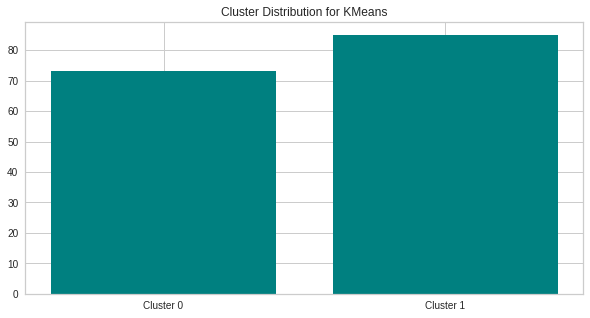

In [58]:
cluster_c = [len(labels[labels==i]) for i in range(0,2)]
cluster_n = ["Cluster "+str(i) for i in range(0,2)]
plt.figure(figsize=(10,5))
plt.title("Cluster Distribution for KMeans")
plt.bar(cluster_n, cluster_c, color = 'teal')
plt.show()

In [59]:
# koristimo tsne za smanjivanje dimenzionalnosti da bi mogli napraviti vizualizaciju u 2d prostoru
tsne = TSNE(n_components=2, init='random', random_state=0)
countries_proj = tsne.fit_transform(df2015_happiness)

countries_proj.shape

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



(158, 2)

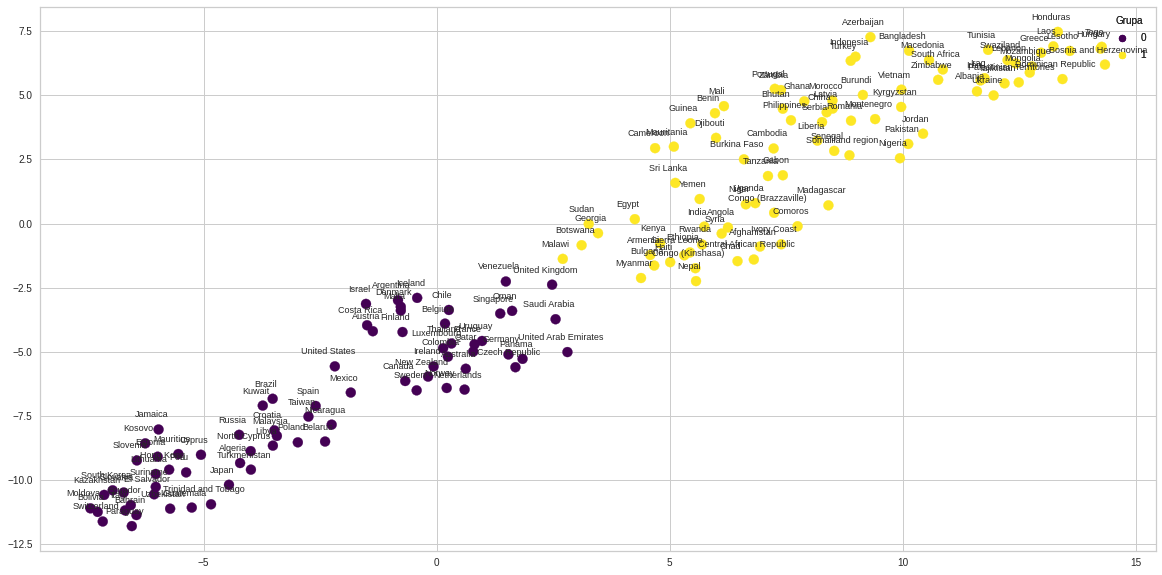

In [65]:
fig, ax = plt.subplots(figsize=(20,10))
scatter = ax.scatter(countries_proj[:, 0], countries_proj[:, 1],c=labels, s=100, cmap='viridis')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="best", title="Grupa")
ax.add_artist(legend1)

for label, x, y in zip(list(clusters_and_countries_2.index), countries_proj[:, 0], countries_proj[:, 1]):
   plt.annotate(
      label,
      xy=(x, y), xytext=(-7, 10),
      textcoords='offset points', ha='center', va='bottom', size=9,
   )


plt.show()

### Clusteriranje s 5 nakupina

In [66]:
km = KMeans(n_clusters=5, random_state=0)
labels = km.fit_predict(df2015_happiness)

In [67]:
names_for_labels = [f"Cluster {label}" for label in labels]
clusters_and_countries_5= pd.DataFrame(zip(df2015_happiness.index,names_for_labels),columns=["Series","Cluster"]).sort_values(by="Cluster").set_index("Series")
clusters_and_countries_5

,Cluster
Series,
Lithuania,Cluster 0
Taiwan,Cluster 0
Kuwait,Cluster 0
Suriname,Cluster 0
Trinidad and Tobago,Cluster 0
...,...
Senegal,Cluster 4
Uganda,Cluster 4
Comoros,Cluster 4


Možemo primjetiti da su zemlje koje su se prethodno ispostavile najsretnije, ponovo smještene u istu nakupinu. Riječ je o Clusteru 3 u kojem se nalazi Švicarska i Skandinavske zemlje(svih top 5 najsretnijih).

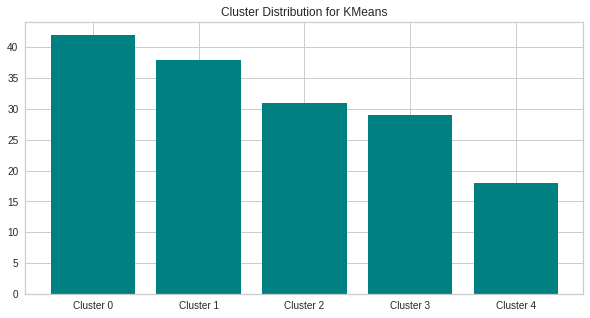

In [49]:
cluster_c = [len(labels[labels==i]) for i in range(0,5)]
cluster_n = ["Cluster "+str(i) for i in range(0,5)]
plt.figure(figsize=(10,5))
plt.title("Cluster Distribution for KMeans")
plt.bar(cluster_n, cluster_c, color = 'teal')
plt.show()

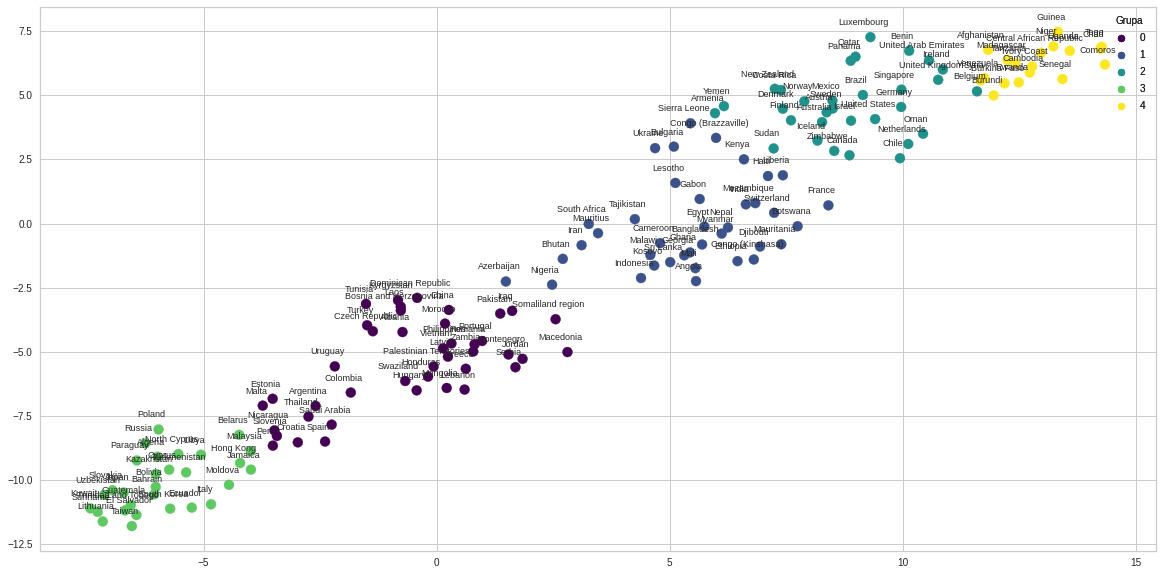

In [50]:
fig, ax = plt.subplots(figsize=(20,10))
scatter = ax.scatter(countries_proj[:, 0], countries_proj[:, 1],c=labels, s=100, cmap='viridis')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="best", title="Grupa")
ax.add_artist(legend1)

for label, x, y in zip(list(clusters_and_countries_5.index), countries_proj[:, 0], countries_proj[:, 1]):
   plt.annotate(
      label,
      xy=(x, y), xytext=(-7, 10),
      textcoords='offset points', ha='center', va='bottom', size=9,
   )


plt.show()

### Clusteriranje s 13 nakupina

In [51]:
km = KMeans(n_clusters=13, random_state=0)
labels = km.fit_predict(df2015_happiness)

In [52]:
names_for_labels = [f"Cluster {label}" for label in labels]
clusters_and_countries_13 = pd.DataFrame(zip(df2015_happiness.index,names_for_labels),columns=["Series","Cluster"]).sort_values(by="Cluster").set_index("Series")
clusters_and_countries_13

,Cluster
Series,
Poland,Cluster 0
Bahrain,Cluster 0
Italy,Cluster 0
Kazakhstan,Cluster 0
Slovenia,Cluster 0
...,...
Panama,Cluster 9
Venezuela,Cluster 9
Brazil,Cluster 9


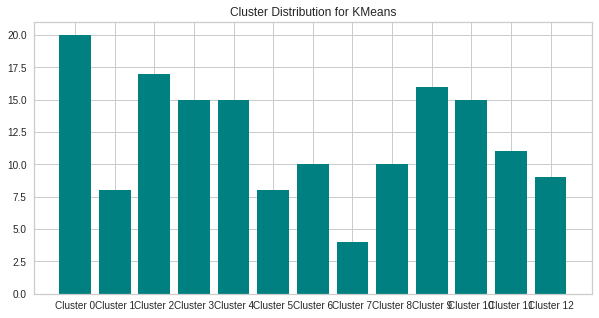

In [53]:
cluster_c = [len(labels[labels==i]) for i in range(0,13)]
cluster_n = ["Cluster "+str(i) for i in range(0,13)]
plt.figure(figsize=(10,5))
plt.title("Cluster Distribution for KMeans")
plt.bar(cluster_n, cluster_c, color = 'teal')
plt.show()

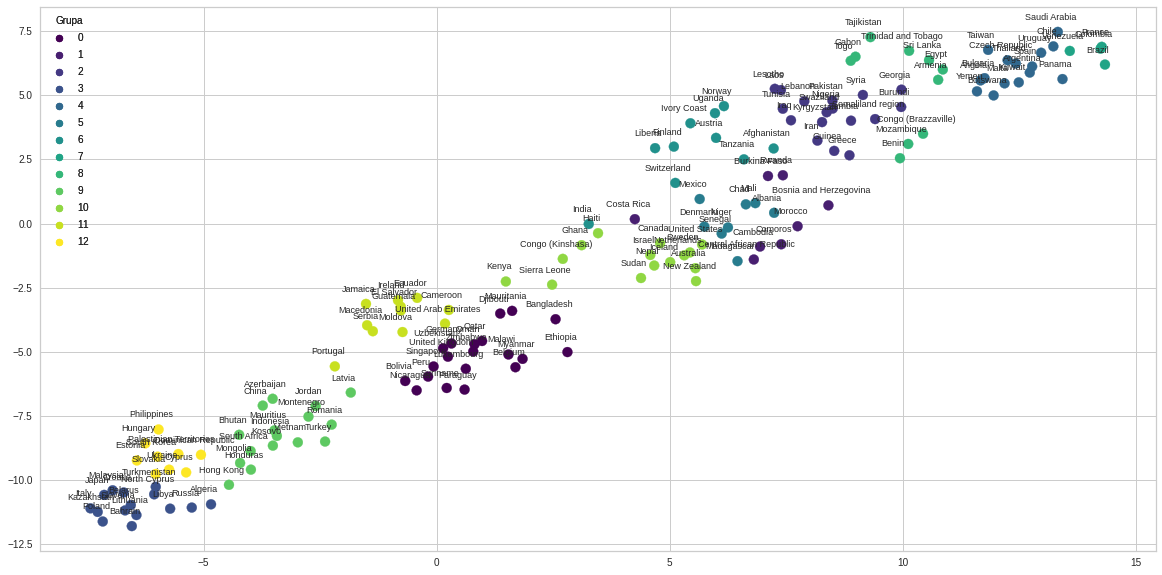

In [54]:
fig, ax = plt.subplots(figsize=(20,10))
scatter = ax.scatter(countries_proj[:, 0], countries_proj[:, 1],c=labels, s=100, cmap='viridis')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="best", title="Grupa")
ax.add_artist(legend1)

for label, x, y in zip(list(clusters_and_countries_13.index), countries_proj[:, 0], countries_proj[:, 1]):
   plt.annotate(
      label,
      xy=(x, y), xytext=(-7, 10),
      textcoords='offset points', ha='center', va='bottom', size=9,
   )


plt.show()

## Stanje u europskim zemljama



> Analizirat ćemo zasebno stanje u europskim zemljama. Vidjet ćemo Koje su europske zemlje najsretnije/najnesretnije u godini 2016.,kako se “sreća” europskih stanovnika kretala u razdoblju 2015.-2019. Također ćemo promotriti neke od glavnih čimbenika za najsretnije i za najnesretnije zemlje. 



In [68]:
Europe = df2016.loc[(df2016['Region'] == 'Central and Eastern Europe') | (df2016['Region'] == 'Western Europe')]

In [69]:
Europe.head()

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,year
0,Denmark,Western Europe,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2016
1,Switzerland,Western Europe,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2016
2,Iceland,Western Europe,3,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2016
3,Norway,Western Europe,4,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2016
4,Finland,Western Europe,5,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2016


In [70]:
Europe_2016_max = Europe.set_index('Country').iloc[0:5].to_dict()['Happiness Score']
Europe_2016_max = list(Europe_2016_max.keys())
Europe_2016_max

['Denmark', 'Switzerland', 'Iceland', 'Norway', 'Finland']

In [71]:
Europe_2016_min = Europe.set_index('Country').iloc[-5:].to_dict()['Happiness Score']
Europe_2016_min = list(Europe_2016_min.keys())
Europe_2016_min

['Albania', 'Armenia', 'Ukraine', 'Georgia', 'Bulgaria']

In [72]:
Europe.tail()

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,year
108,Albania,Central and Eastern Europe,109,4.655,0.95530,0.50163,0.73007,0.31866,0.05301,0.16840,2016
120,Armenia,Central and Eastern Europe,121,4.360,0.86086,0.62477,0.64083,0.14037,0.03616,0.07793,2016
122,Ukraine,Central and Eastern Europe,123,4.324,0.87287,1.01413,0.58628,0.12859,0.01829,0.20363,2016
125,Georgia,Central and Eastern Europe,126,4.252,0.83792,0.19249,0.64035,0.32461,0.31880,0.06786,2016
128,Bulgaria,Central and Eastern Europe,129,4.217,1.11306,0.92542,0.67806,0.21219,0.00615,0.12793,2016


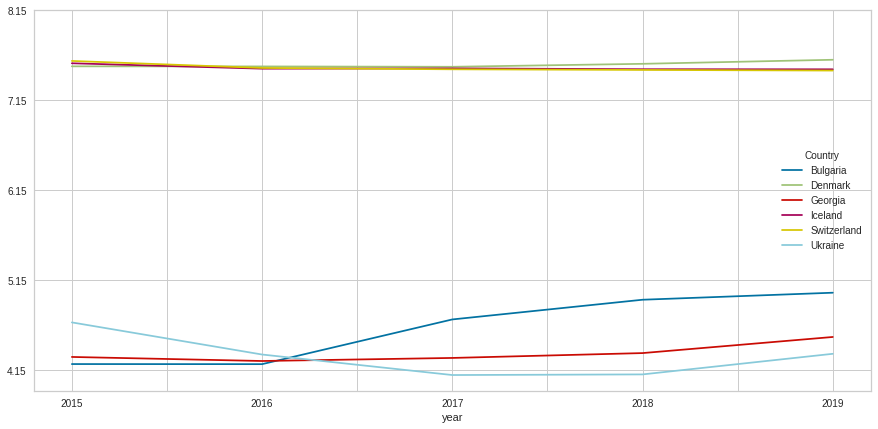

In [73]:
# na istom grafu prikazujemo kako se happiness score mijenjao kroz godine u top 3 najsretnije i top 3 najnesretnije države Europe
Europe_minmax = df_concat[(df_concat.Country == 'Switzerland') | (df_concat.Country == 'Iceland') | (df_concat.Country == 'Denmark') | (df_concat.Country == 'Bulgaria') | (df_concat.Country == 'Georgia') | (df_concat.Country == 'Ukraine') ]

#Plot happiness scores
fig, ax = plt.subplots(figsize=(15,7))
Europe_minmax.groupby(['year','Country']).mean()['Happiness Score'].unstack().plot(ax=ax)
plt.yticks(np.arange(4.15, 8.5, 1));

In [74]:
Europe_largest_score = pd.melt(Europe.head(),id_vars= ['Country'] ,value_vars=["Economy (GDP per Capita)",	"Freedom","Health (Life Expectancy)", "Family"])
Europe_largest_score = Europe_largest_score.reset_index()

In [75]:
Europe_lowest_score = pd.melt(Europe.tail(),id_vars= ['Country'] ,value_vars=["Economy (GDP per Capita)",	"Freedom","Health (Life Expectancy)", "Family"])
Europe_lowest_score = Europe_lowest_score.reset_index()

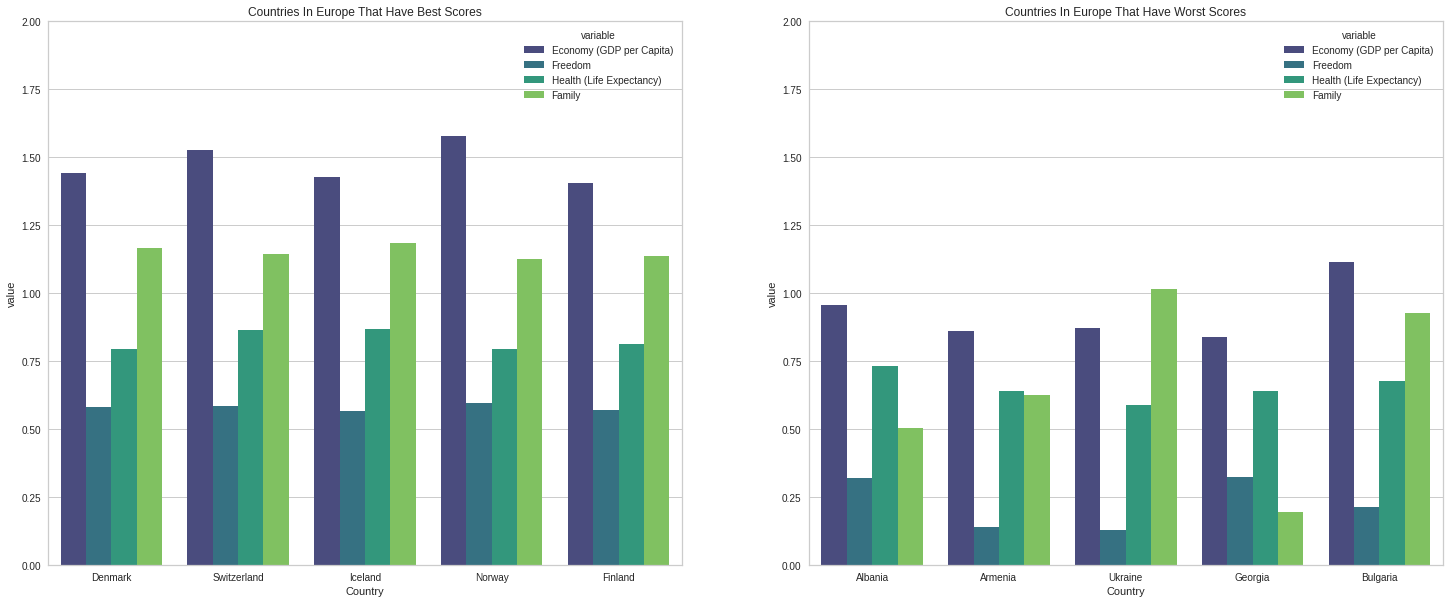

In [76]:
plt.figure(figsize = (25,10))
plt.subplot(1,2,1)
plt.ylim((0,2))
sns.barplot(x='Country', y='value', hue='variable', data=Europe_largest_score,palette = 'viridis')
plt.title("Countries In Europe That Have Best Scores")



plt.subplot(1,2,2)
plt.ylim((0,2))
sns.barplot(x='Country', y='value', hue='variable', data= Europe_lowest_score,palette = 'viridis')
plt.title("Countries In Europe That Have Worst Scores")
plt.show()

## Predviđanja - Linearna regresija



> Cilj nam je predviditi Happiness Score na temelju ostalih čimbenika(ekonomija,zdravlje itd.) S obzirom da na izlazu očekujemo kontinuiranu/brojčana vrijednost, riječ je o problemu **regresije**. Za predviđanja ćemo koristiti različite modele koje ćemo u konačnici evaluirati i usporediti. 


In [77]:
# odbacujemo stupce koje nećemo koristiti
df2015_for_regression=df2015.drop(['Happiness Rank','Country','Region','year'], axis=1)
df2015_for_regression.head()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [78]:
# predviđamo happiness score(y_reg), a sve ostale varijable stavljamo u x_reg 
X_reg = df2015_for_regression.drop(['Happiness Score'], axis=1)
y_reg = df2015_for_regression['Happiness Score']


# podatke dijelimo na train i test, 70% za treniranje, 30% za testiranje
X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.3, random_state=2)

### Evaluacija regresijskog modela

<br>

1. Srednja apsolutna pogreška (engl. *Mean Absolute Error*)
$$MAE=\frac{1}{n} \sum\limits_{i=1}^n |y_i - \hat{y_i}|$$

2. Srednja kvadratna pogreška (engl. Mean Squared Error) $$MSE = \frac{1}{n} \sum\limits_{i=1}^n (y_i - \hat{y_i})^2$$

3. Korijen srednje kvadratne pogreške (engl. Root Mean Squared Error)
$$RMSE = \sqrt{\frac{1}{n} \sum\limits_{i=1}^n (y_i - \hat{y_i})^2}.$$

In [79]:
def evaluate_regression(y, y_pred):
  print('MAE: {:.3f}'.format(metrics.mean_absolute_error(y, y_pred)))
  print('MSE: {:.3f}'.format(metrics.mean_squared_error(y, y_pred)))
  print('RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y, y_pred))))  

In [80]:
def scatter_eval(y, y_pred):
  plt.figure(figsize=(10,7))
  plt.scatter(y, y_pred)
  plt.xlabel('Točno')
  plt.ylabel('Predviđeno')
  # pravac f(x) = x
  plt.plot(y, y, color='salmon')
  plt.show()

### Stablo odluke za regresiju

In [100]:
decision_tree = DecisionTreeRegressor() 
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [101]:
y_pred_test = decision_tree.predict(X_test)
print('Prvih 10 predviđanja:', np.round(y_pred_test[:10],3))

Prvih 10 predviđanja: [7.286 7.427 2.839 6.867 3.904 5.123 6.946 5.833 6.81  5.889]


In [102]:
print('Evaluacija na skupu za testiranje:\n' + '-'*50)
evaluate_regression(y_test, y_pred_test)

Evaluacija na skupu za testiranje:
--------------------------------------------------
MAE: 0.637
MSE: 0.720
RMSE: 0.849


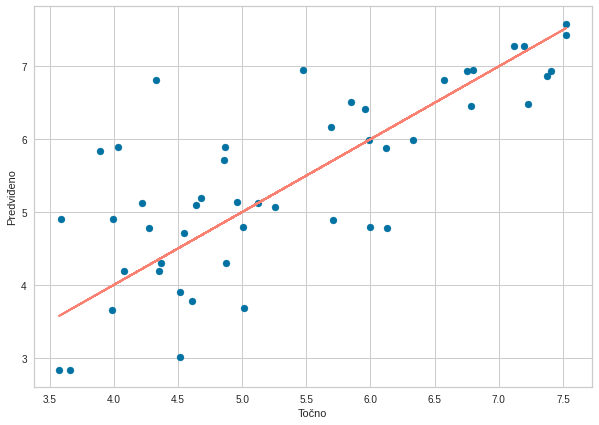

In [103]:
scatter_eval(y_test, y_pred_test)

Gledamo skup za treniranje

In [86]:
y_pred_train = decision_tree.predict(X_train)

print('Evaluacija na skupu za treniranje:\n' + '-'*50)
evaluate_regression(y_train, y_pred_train)

Evaluacija na skupu za treniranje:
--------------------------------------------------
MAE: 0.000
MSE: 0.000
RMSE: 0.000


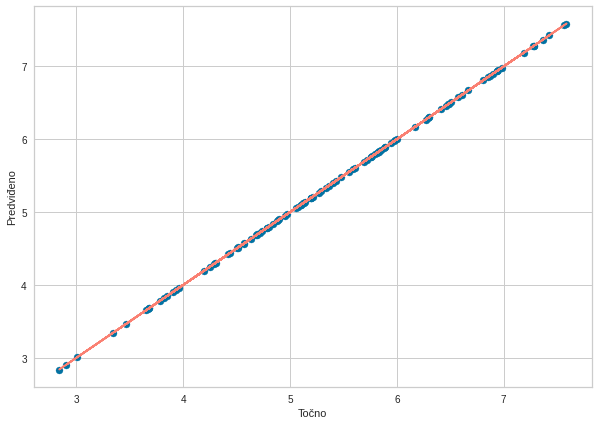

In [87]:
scatter_eval(y_train, y_pred_train)

### Slučajne šume (engl. Random Forests)

In [88]:
model = RandomForestRegressor(n_estimators=15, random_state=0)
model.fit(X_train, y_train)
y_pred_test = model.predict(X_test)

In [89]:
print('Evaluacija na skupu za testiranje:\n' + '-'*50)
evaluate_regression(y_test, y_pred_test)

Evaluacija na skupu za testiranje:
--------------------------------------------------
MAE: 0.534
MSE: 0.428
RMSE: 0.654


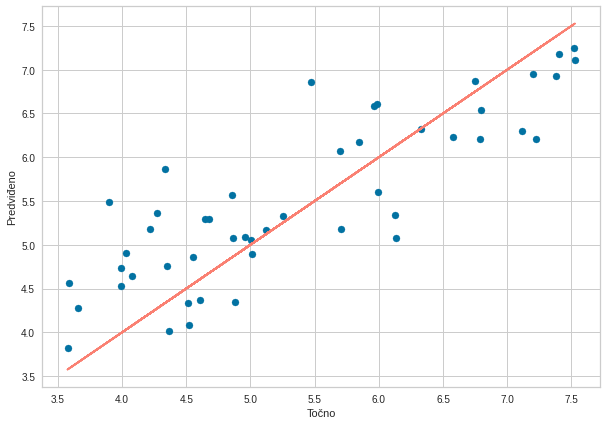

In [90]:
scatter_eval(y_test, y_pred_test)

In [91]:
print('Evaluacija na skupu za treniranje:\n' + '-'*50)
evaluate_regression(y_train, model.predict(X_train))

Evaluacija na skupu za treniranje:
--------------------------------------------------
MAE: 0.205
MSE: 0.079
RMSE: 0.280


### *(Multivarijabilna)* Linearna regresija

> Podacima iz skupa za treniranje prilagođavamo  linerani model
$$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ... + a_kx_k.$$

In [92]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [93]:
model.intercept_

2.1371280582548797

In [94]:
model.coef_

array([1.22423343, 1.29790503, 0.4580786 , 1.18044505, 0.58663891,
       0.36052767])

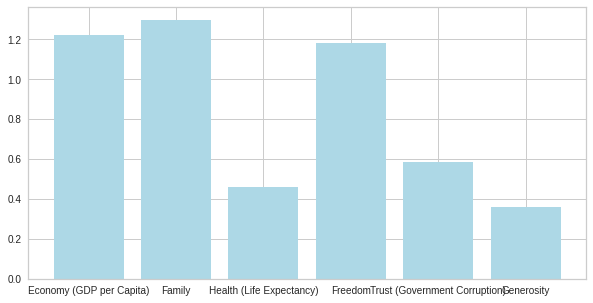

In [95]:
plt.figure(figsize=(10,5))
plt.bar(X_train.columns, model.coef_, color='lightblue')
plt.show()

Dakle, predviđanje $\hat{y}$ dobijemo kao: 

$$\hat{y} = 2.137 + 1.224x_{Economy} + 1.298x_{Family} + 0.458x_{Health} + 1.180x_{Freedom} + 0.587x_{Trust} + 0.361x_{Generosity}$$

In [96]:
model.predict(X_test)[0]

6.831366142963936

In [97]:
np.sum(X_test.iloc[0]*model.coef_) + model.intercept_

6.831366142963935

In [98]:
print('Evaluacija na skupu za testiranje:\n' + '-'*50)
evaluate_regression(y_test, model.predict(X_test))

Evaluacija na skupu za testiranje:
--------------------------------------------------
MAE: 0.454
MSE: 0.346
RMSE: 0.588


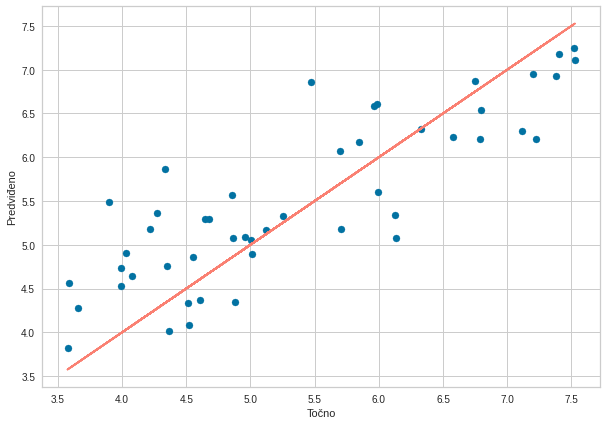

In [99]:
scatter_eval(y_test, y_pred_test)

### Usporedba evaluacija na skupu za testiranje




*   Stablo odluke

> MAE: 0.637, MSE: 0.720, RMSE: 0.849



---



*   Slučajne šume



> MAE: 0.534, MSE: 0.428, RMSE: 0.654


---


*   Multivarijablina linearna regresija






> MAE: 0.454, MSE: 0.346, RMSE: 0.588


---

















Cilj nam je imati što manje vrijednosti MAE,MSE i RMSE. Njihove što manje vrijednosti impliciraju što veću točnost regresijskog modela. 
Uspoređujući evaluacije napravljene na skupu za testiranje, zaključujemo da je najlošiji model dobiven korištenjem stabla odluka, a najbolji korištenjem multivarijabilne regresije. 
Što se tiče stabla odluke, tamo smo kod evaluacije na skupu za treniranje dobili da su MAE,MSE i RMSE jednaki 0, a na skupu za testiranje najlošije rezultate. Razlog tome je što je očito došlo do *overfitanja*, odnosno kod stabla odluke je model "naučio napamet" skup za treniranje i zato ne daje dobre rezultate kad mu damo nešto što nikada nije vidio(skup za testiranje). 

## Vizualizacija za kraj

In [104]:
data = dict(type = 'choropleth', 
           locations = df2015['Country'],
           locationmode = 'country names',
           colorscale='RdYlGn',
           z = df2015['Happiness Score'], 
           text = df2015['Country'],
           colorbar = {'title':'Happiness Score'})

layout = dict(title = 'Geographical Visualization of Happiness Score', 
              geo = dict(showframe = True, projection = {'type': 'azimuthal equal area'}))

choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)